# Initial Model Building
This file is responsible for Train-test split. Training basic models to get a baseline performance. Evaluating models using chosen metrics (e.g., accuracy, F1-score, RMSE).
Our evaluation is based on MAE.

Step 0: Importing libraries

In [4]:
import pandas as pd
from src.data.data_fetcher import get_all_features, get_raw_data
from src.features.feature_engineering import prepare_data

%pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from src.features.preprocess_data import get_preprocessed_test_data, fetch_preprocessed_data

Note: you may need to restart the kernel to use updated packages.


 ## Step 1: Importing data

In [5]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()

## Step 2: Perform temporal alignment on training data

In [6]:
X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample('1H').mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample('1H').mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_o

## Step 3: Prepare the data for modeling by handling missing values and splitting the data

In [7]:
(X_train_obs_combined.shape, X_val_obs_combined.shape, y_train_obs_combined.shape, y_val_obs_combined.shape, \
 X_train_est_combined.shape, X_val_est_combined.shape, y_train_est_combined.shape, y_val_est_combined.shape)

((2343, 45), (586, 45), (2343,), (586,), (440, 45), (110, 45), (440,), (110,))

### Linear regression model

In [8]:
# Initialize the Linear Regression model
lr_model_obs_combined = LinearRegression()

# Train the Linear Regression model on the observed data
lr_model_obs_combined.fit(X_train_obs_combined, y_train_obs_combined)

LinearRegression()

Linear regression predictions

In [9]:
# Predict the target variable on the validation observed data
y_pred_val_obs_combined = lr_model_obs_combined.predict(X_val_obs_combined)
y_pred_val_est_combined = lr_model_obs_combined.predict(X_val_est_combined)

# Evaluate the model's performance using Mean Absolute Error (MAE) on the combined validation observed data
mae_obs_combined = mean_absolute_error(y_val_obs_combined, y_pred_val_obs_combined)
mae_est_combined = mean_absolute_error(y_val_est_combined, y_pred_val_est_combined)
print('MAE on validation observed data: ', mae_obs_combined)
print('MAE on validation estimated data: ', mae_est_combined)


MAE on validation observed data:  37.085856429480856
MAE on validation estimated data:  57.50920618456471


In [10]:
# Make predictions using the trained Linear Regression model on the processed test estimated data
y_pred_test_est_a = lr_model_obs_combined.predict(X_test_estimated_a_processed)
y_pred_test_est_b = lr_model_obs_combined.predict(X_test_estimated_b_processed)
y_pred_test_est_c = lr_model_obs_combined.predict(X_test_estimated_c_processed)
# Combine the predictions from the three locations into a single dataframe

y_pred_test_est_combined = y_pred_test_est_a + y_pred_test_est_b + y_pred_test_est_c
y_pred_test_est_combined.shape


(2880,)

## Step 4: Evaluate the model

## Step 5: Visualize the results

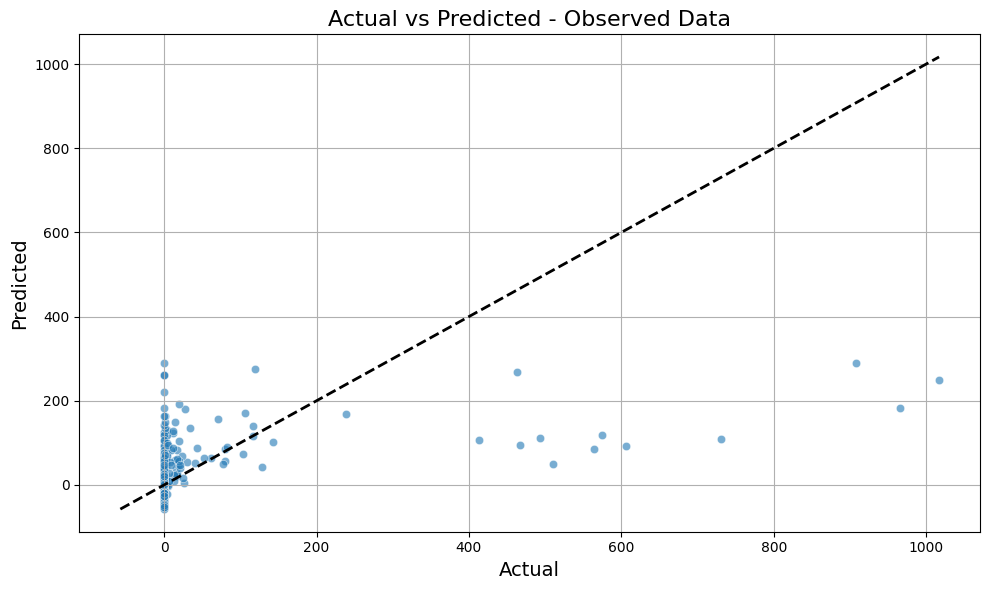

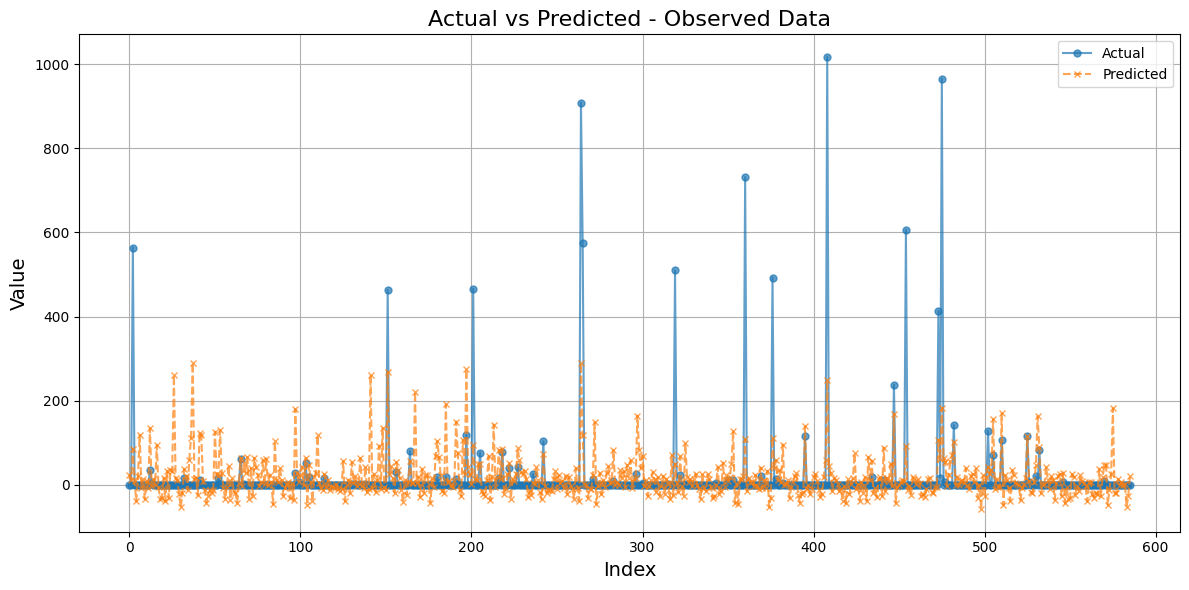

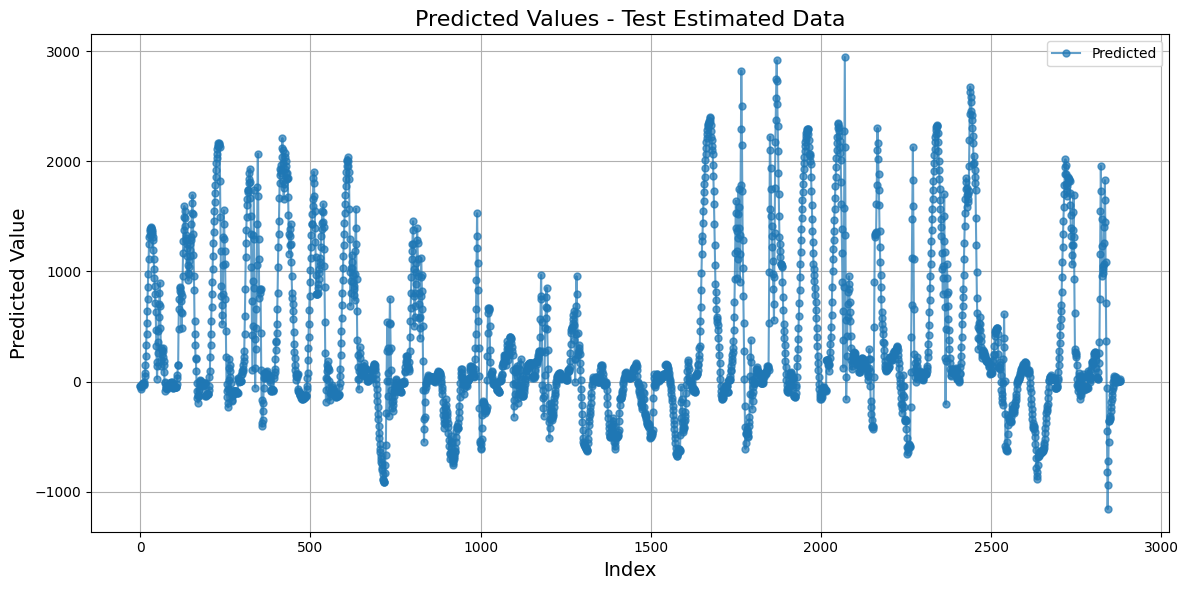

In [11]:
import matplotlib.pyplot as plt

# Set up the plotting area
plt.figure(figsize=(10, 6))

# Scatter plot of Actual vs Predicted values
plt.scatter(y_val_obs_combined, y_pred_val_obs_combined, alpha=0.6, edgecolors='w', linewidth=0.5)

# Plot a line representing perfect predictions
min_val = min(y_val_obs_combined.min(), y_pred_val_obs_combined.min())
max_val = max(y_val_obs_combined.max(), y_pred_val_obs_combined.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

# Titles and labels
plt.title('Actual vs Predicted - Observed Data', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Set up the plotting area
plt.figure(figsize=(12, 6))

# Line plot of Actual values
plt.plot(y_val_obs_combined.reset_index(drop=True), label='Actual', linestyle='-', marker='o', markersize=5, alpha=0.7)

# Line plot of Predicted values
plt.plot(pd.Series(y_pred_val_obs_combined, index=y_val_obs_combined.index).reset_index(drop=True), label='Predicted', linestyle='--', marker='x', markersize=5, alpha=0.7)

# Titles and labels
plt.title('Actual vs Predicted - Observed Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(pd.Series(y_pred_test_est_combined, index=X_test_estimated_a_processed.index).reset_index(drop=True), label='Predicted', linestyle='-', marker='o', markersize=5, alpha=0.7)
plt.title('Predicted Values - Test Estimated Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 6: Save the model

In [12]:
RES_PATH = 'results/output/'

model = pd.Series(y_pred_test_est_combined, name='prediction')
model = model.reset_index(drop=True).to_frame(name='prediction')
model.insert(0, 'id', range(len(model)))
model['prediction'] = model['prediction'].apply(lambda x: max(0, x))

model.to_csv(f'{RES_PATH}linear_regression_with_no_feature_engineering.csv', index=False)
model.head()

,id,prediction
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


# Fine-tuning the model

In [13]:

# Create polynomial features
poly = PolynomialFeatures(degree=2)

# Scale features
scaler = StandardScaler()

# Initialize Ridge Regression model with regularization strength alpha
ridge_model = Ridge(alpha=1.0)

# Create a pipeline with polynomial feature creation, scaling, and Ridge Regression
model = make_pipeline(poly, scaler, ridge_model)

# Train the model with training data
model.fit(X_train_obs_combined, y_train_obs_combined)

# Make predictions on validation data
y_val_pred = model.predict(X_val_obs_combined)

# Calculate Mean Absolute Error on validation data
# mae_obs_combined = mean_absolute_error(y_val_obs_combined, y_pred_val_obs_combined)
mae_val = mean_absolute_error(y_val_obs_combined, y_val_pred)
print('MAE:', mae_val)


MAE: 37.165417427902746
